In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
import seaborn as sns
from scipy import stats

In [339]:
df=pd.read_csv('F:\\train_hr.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [340]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [342]:
df['education']=df['education'].fillna("Bachelor's")
df['education'].nunique()

3

In [343]:
a=df['region'].str.split('_')
df['region']=a.str[-1]
df['region']=df['region'].astype('int')

In [344]:
le=LabelEncoder()
df['department']=le.fit_transform(df['department'])
df['department']=df['department'].astype('category')
df['education']=le.fit_transform(df['education'])
df['education']=df['education'].astype('category')
df['gender']=le.fit_transform(df['gender'])
df['gender']=df['gender'].astype('category')
df['recruitment_channel']=le.fit_transform(df['recruitment_channel'])
df['recruitment_channel']=df['recruitment_channel'].astype('category')
df['is_promoted']=df['is_promoted'].astype('category')

In [345]:
df['previous_year_rating']=df['previous_year_rating'].fillna('3.0')
df['previous_year_rating']=df['previous_year_rating'].astype('float')

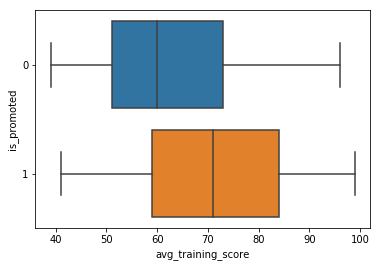

In [346]:
sns.boxplot(x=df['avg_training_score'],y=df['is_promoted'])

(48922, 14)

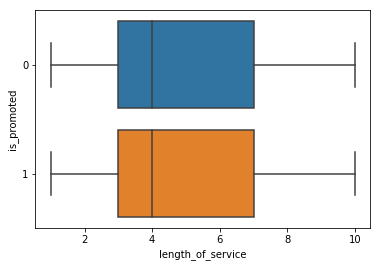

In [347]:
z=stats.zscore(df['length_of_service'])
df=df[z<1]
sns.boxplot(x=df['length_of_service'],y=df['is_promoted'])
df.shape

In [348]:
x=df.drop(['is_promoted','employee_id'],axis=1)
y=df['is_promoted']

In [349]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [401]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [402]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=40)
dt.fit(x_train,y_train)
y_dt=dt.predict(x_test)
roc_auc_score(y_dt,y_test)

0.66773766898546

In [403]:
bag=GradientBoostingClassifier(n_estimators=700)
bag.fit(x_train,y_train)
y_bag=bag.predict(x_test)
roc_auc_score(y_bag,y_test)

0.9217855511416009

In [404]:
rf=BaggingClassifier(dt,n_estimators=10)
rf.fit(x_train,y_train)
y_rf=rf.predict(x_test)
roc_auc_score(y_rf,y_test)

0.8191743838648522

In [405]:
leg=LogisticRegression(C=0.1,penalty='l1')
leg.fit(x_train,y_train)
y_leg=leg.predict(x_test)
roc_auc_score(y_leg,y_test)

0.7741130162393867

In [406]:
confusion_matrix(y_leg,y_test)

array([[11139,   992],
       [   37,    63]], dtype=int64)

In [407]:
test=pd.read_csv('F:\\test_2umaH9m.csv')
test=test.drop(['employee_id'],axis=1)

In [408]:
test['education']=test['education'].fillna("Bachelor's")
test['education'].nunique()

3

In [409]:
a=test['region'].str.split('_')
test['region']=a.str[-1]
test['region']=test['region'].astype('int')

In [410]:
le=LabelEncoder()
test['department']=le.fit_transform(test['department'])
test['department']=test['department'].astype('category')
test['education']=le.fit_transform(test['education'])
test['education']=test['education'].astype('category')
test['gender']=le.fit_transform(test['gender'])
test['gender']=test['gender'].astype('category')
test['recruitment_channel']=le.fit_transform(test['recruitment_channel'])
test['recruitment_channel']=test['recruitment_channel'].astype('category')

In [411]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,26,0,1,2,1,24,NaN,1,1,0,77
1,2,4,0,0,0,1,31,3.0,5,0,0,51
2,7,13,0,1,0,1,31,1.0,4,0,0,47
3,5,2,0,0,0,3,31,2.0,9,0,0,65
4,1,29,0,1,2,1,30,4.0,7,0,0,61


In [412]:
test['previous_year_rating']=test['previous_year_rating'].fillna('3')
test['previous_year_rating']=test['previous_year_rating'].astype('float')

In [413]:
y_test=bag.predict(test)

In [414]:
submit=pd.read_csv('F:\\sample_submission_M0L0uXE.csv')
submit['is_promoted']=y_test

In [415]:
submit['is_promoted'].value_counts()

0    22760
1      730
Name: is_promoted, dtype: int64

In [416]:
submit.to_csv('F:\\ans.csv',index=False)

In [417]:
submit

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
5,46232,0
6,54542,0
7,67269,0
8,66174,0
9,76303,0
